In [145]:
%%html

<style>
    .jp-OutputArea-child {
        display: inline-block;
    }
</style>

In [146]:
from pyEDM import *
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from labellines import labelLine, labelLines
import os
import seaborn as sns

In [147]:
#Here is the main directory
OROMIA_TS_DIR = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/Final_TS/oromia_df_normalized/'
#save figures to this folder
FIGURES = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Figures/'
SMOOTHED_DIR = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/Final_TS/smoothed/'

#Directory for seasonal decomposed time series
OROMIA_TS_DS = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/Final_TS/oromia_df_seasonaldecomposed/'

In [148]:
def ed_lcs(in_dir, var, train, test, title, Tp, tau):
    '''
    This function evaluates the Simplex prediction skill for embedding dimensions 1 to 10 and plots all land cover times series data on the same figure for a given variable
    
    Args:
    in_dir = path to directory of time series datasets
    var = environmental variable 
    train = number of points in the time series to use for training, range separated by a space
    test = number of points in the time series to use for testing, range separated by a space
    title = label for figure of variable tested
    Tp = Prediction Interval
    tau = Embedding delay 
    
    '''
    files = np.array(os.listdir(in_dir))
    csvs = pd.Series(files).str.contains('croplands|_savannas|grasslands')
    files = files[csvs]
    
    for i in files:  
        embed_result = EmbedDimension(pathIn = in_dir, dataFile = i, lib = train, pred = test, Tp = Tp, tau = tau, columns = var, showPlot = False)
        plt.plot(embed_result.E, embed_result.rho, label = str(i[7:-12]))
    plt.xlabel('Embedding Dimension')
    plt.ylabel('Prediction Skill ' r'$\rho$')
    plt.ylim(0, 1, 0.1)
    plt.title('Time Delay Embedding ' + title)
    plt.legend(loc = 'lower right', ncol = 2, fontsize = 8, title = 'Land Cover')
    plt.show()

In [149]:
def ed_lcs_tp(in_dir, file, var, train, test, title, tau):
    '''
    This function evaluates the Simplex prediction skill for embedding dimensions 1 to 10 and plots the prediction interval result for values 1-10 on the same figure for a given variable
    
    Args:
    in_dir = path to directory of time series datasets
    var = environmental variable 
    train = number of points in the time series to use for training, range separated by a space
    test = number of points in the time series to use for testing, range separated by a space
    title = label for figure of land cover and variable tested
    tau = Embedding delay 
    
    '''
    
    predict_interval = list(range(1,11))
    output = pd.DataFrame(list(range(1,11)), columns=['E'])

    
    for i,t in enumerate(predict_interval):  
        embed_result = EmbedDimension(pathIn = in_dir, dataFile = file, lib = train, pred = test, Tp = t, tau = tau, columns = var, showPlot = False)
        col = 'rho' + str(t)
        output[col] = embed_result.rho
    return output 

        
#     predict_interval = list(range(1,11))
#     output = pd.DataFrame(columns=['E', 'Tp', 'rho'])

    
#     for i,t in enumerate(predict_interval):  
#         embed_result = EmbedDimension(pathIn = in_dir, dataFile = file, lib = train, pred = test, Tp = t, tau = tau, columns = var, showPlot = False)
#         embed_result.insert(1,'Tp', [t]*10)
#         output = pd.concat([output,embed_result], ignore_index=True)
#     return output 


In [150]:
#need to figure out how to iterate through E values 
#extend prediction interval to 6 months

def predict_skill(in_dir, file, var, train, test, title, tau):
    '''
    This function evaluates the Simplex prediction skill for embedding dimensions 1 to 10 and plots the prediction interval result for values 1-10 on the same figure for a given variable
    
    Args:
    in_dir = path to directory of time series datasets
    var = environmental variable 
    train = number of points in the time series to use for training, range separated by a space
    test = number of points in the time series to use for testing, range separated by a space
    title = label for figure of land cover and variable tested
    tau = Embedding delay 
    
    '''
    
    predict_interval = list(range(1,11))
    output = pd.DataFrame(list(range(1,11)), columns=['E'])

    
    for i,t in enumerate(predict_interval):  
        embed_result = PredictInterval(pathIn = in_dir, dataFile = file, E = t, lib = train, pred = test, Tp = t, tau = tau, columns = var, showPlot = False)
        col = 'rho' + str(t)
        output[col] = embed_result.rho
    return output 

        
#     predict_interval = list(range(1,11))
#     output = pd.DataFrame(columns=['E', 'Tp', 'rho'])

    
#     for i,t in enumerate(predict_interval):  
#         embed_result = EmbedDimension(pathIn = in_dir, dataFile = file, lib = train, pred = test, Tp = t, tau = tau, columns = var, showPlot = False)
#         embed_result.insert(1,'Tp', [t]*10)
#         output = pd.concat([output,embed_result], ignore_index=True)
#     return output 


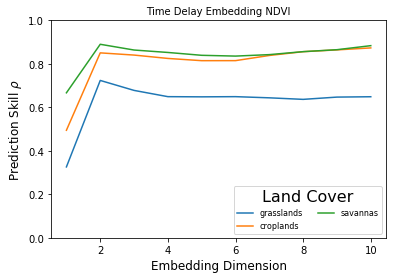

In [165]:
ed_lcs(OROMIA_TS_DIR, 'NDVI', '1 100', '101 522', 'NDVI', 1, -1)
# ed_lcs(OROMIA_TS_DIR, 'P', '1 100', '101 522', 'Precipitation', 1, -1)
# ed_lcs(OROMIA_TS_DIR, 'SM', '1 100', '101 522', 'Soil Moisture', 1, -1)
# ed_lcs(OROMIA_TS_DIR, 'LST', '1 100', '101 522', 'Land Surface Temperature', 1, -1)
# ed_lcs(OROMIA_TS_DIR, 'TMP', '1 100', '101 522', 'Temperature', 1, -1)
# ed_lcs(OROMIA_TS_DIR, 'refET', '1 100', '101 522', 'Reference ET', 1, -1)

In [152]:
tp_ndvi_croplands = ed_lcs_tp(OROMIA_TS_DIR, 'oromia_croplands_df_norm.csv', 'NDVI', '1 100', '101 522', 'Croplands NDVI', -1)
tp_ndvi_grasslands = ed_lcs_tp(OROMIA_TS_DIR, 'oromia_grasslands_df_norm.csv', 'NDVI', '1 100', '101 522', 'Grasslands NDVI', -1)
tp_ndvi_savannas = ed_lcs_tp(OROMIA_TS_DIR, 'oromia_savannas_df_norm.csv', 'NDVI', '1 100', '101 522', 'Savannas NDVI', -1)

tp_precip_croplands = ed_lcs_tp(OROMIA_TS_DIR, 'oromia_croplands_df_norm.csv', 'P', '1 100', '101 522', 'Croplands NDVI', -1)
tp_precip_grasslands = ed_lcs_tp(OROMIA_TS_DIR, 'oromia_grasslands_df_norm.csv', 'P', '1 100', '101 522', 'Grasslands NDVI', -1)
tp_precip_savannas = ed_lcs_tp(OROMIA_TS_DIR, 'oromia_savannas_df_norm.csv', 'P', '1 100', '101 522', 'Savannas NDVI', -1)

tp_sm_croplands = ed_lcs_tp(OROMIA_TS_DIR, 'oromia_croplands_df_norm.csv', 'SM', '1 100', '101 522', 'Croplands NDVI', -1)
tp_sm_grasslands = ed_lcs_tp(OROMIA_TS_DIR, 'oromia_grasslands_df_norm.csv', 'SM', '1 100', '101 522', 'Grasslands NDVI', -1)
tp_sm_savannas = ed_lcs_tp(OROMIA_TS_DIR, 'oromia_savannas_df_norm.csv', 'SM', '1 100', '101 522', 'Savannas NDVI', -1)

tp_lst_croplands = ed_lcs_tp(OROMIA_TS_DIR, 'oromia_croplands_df_norm.csv', 'LST', '1 100', '101 522', 'Croplands NDVI', -1)
tp_lst_grasslands = ed_lcs_tp(OROMIA_TS_DIR, 'oromia_grasslands_df_norm.csv', 'LST', '1 100', '101 522', 'Grasslands NDVI', -1)
tp_lst_savannas = ed_lcs_tp(OROMIA_TS_DIR, 'oromia_savannas_df_norm.csv', 'LST', '1 100', '101 522', 'Savannas NDVI', -1)

tp_temp_croplands = ed_lcs_tp(OROMIA_TS_DIR, 'oromia_croplands_df_norm.csv', 'TMP', '1 100', '101 522', 'Croplands NDVI', -1)
tp_temp_grasslands = ed_lcs_tp(OROMIA_TS_DIR, 'oromia_grasslands_df_norm.csv', 'TMP', '1 100', '101 522', 'Grasslands NDVI', -1)
tp_temp_savannas = ed_lcs_tp(OROMIA_TS_DIR, 'oromia_savannas_df_norm.csv', 'TMP', '1 100', '101 522', 'Savannas NDVI', -1)

tp_et_croplands = ed_lcs_tp(OROMIA_TS_DIR, 'oromia_croplands_df_norm.csv', 'refET', '1 100', '101 522', 'Croplands NDVI', -1)
tp_et_grasslands = ed_lcs_tp(OROMIA_TS_DIR, 'oromia_grasslands_df_norm.csv', 'refET', '1 100', '101 522', 'Grasslands NDVI', -1)
tp_et_savannas = ed_lcs_tp(OROMIA_TS_DIR, 'oromia_savannas_df_norm.csv', 'refET', '1 100', '101 522', 'Savannas NDVI', -1)


In [156]:
#this is what the output looks like, a table of all potential rhos up to 10 dekads ahead for up to 10 embedding dimensions
ed_lcs_tp(OROMIA_TS_DIR, 'oromia_grasslands_df_norm.csv', 'NDVI', '1 100', '101 522', 'Grasslands NDVI', -1)

,E,rho1,rho2,rho3,rho4,rho5,rho6,rho7,rho8,rho9,rho10
0,1,0.326027,-0.031225,-0.028540,0.062032,0.206523,0.237244,0.279784,0.352882,0.256193,0.206922
1,2,0.723715,0.547823,0.403106,0.370047,0.358550,0.344308,0.338380,0.383813,0.404459,0.355719
2,3,0.677860,0.549698,0.425286,0.396975,0.381126,0.349880,0.376488,0.413254,0.408048,0.382583
3,4,0.649102,0.561062,0.457119,0.414131,0.383330,0.394488,0.417728,0.455917,0.432240,0.372464
4,5,0.648279,0.545806,0.466014,0.423422,0.406686,0.422775,0.456703,0.472892,0.452991,0.354983
5,6,0.649116,0.535916,0.475445,0.440896,0.433673,0.458960,0.489065,0.516269,0.454111,0.362526
6,7,0.643755,0.535329,0.488619,0.470545,0.474000,0.498874,0.536697,0.532336,0.461897,0.382043
7,8,0.636665,0.556426,0.506029,0.494984,0.507886,0.537484,0.573064,0.554397,0.484663,0.420871
8,9,0.647087,0.568378,0.528279,0.519899,0.528368,0.574709,0.604300,0.566661,0.496345,0.431427
9,10,0.648740,0.578842,0.543447,0.541093,0.552531,0.595736,0.621113,0.584413,0.519712,0.441739


In [158]:
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 16

plt.rc('font', size=BIGGER_SIZE)         # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Plot Prediction Skill across Variabes and Land Cover types

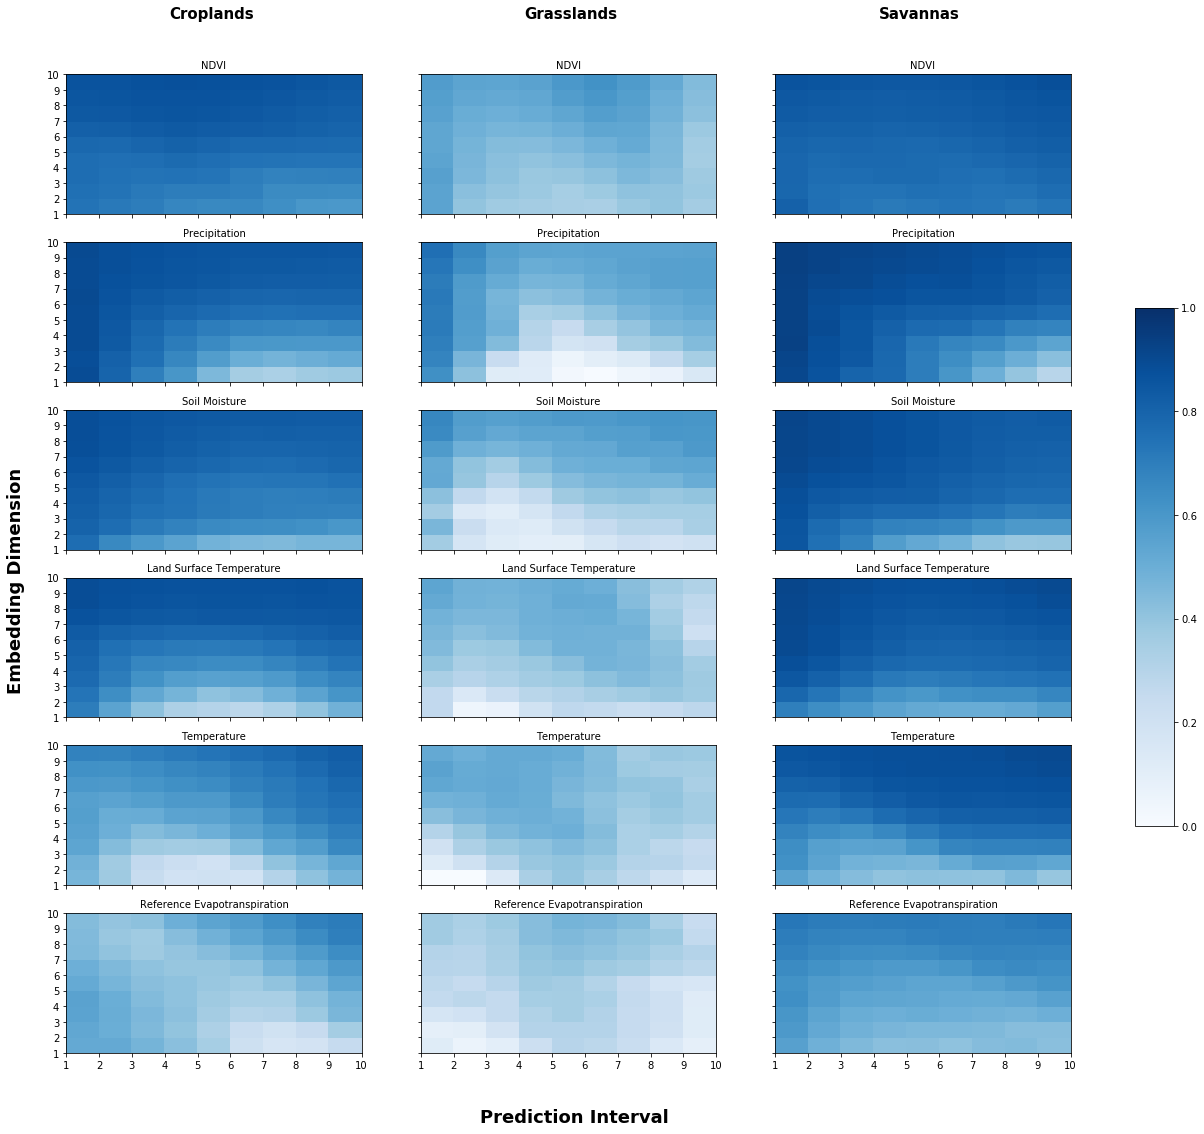

In [163]:
fig, axs = plt.subplots(6, 3, figsize=(18,18), sharex=True, sharey=True)
axs = axs.ravel()
fig = plt.gcf()
var_list = ['NDVI', 'Precip', 'SM', 'LST', 'Temp', 'RefET']
lc_list = ['Croplands', 'Grasslands', 'Savannas ']


df_list = [tp_ndvi_croplands, tp_ndvi_grasslands, tp_ndvi_savannas, 
          tp_precip_croplands, tp_precip_grasslands, tp_precip_savannas, 
          tp_sm_croplands, tp_sm_grasslands, tp_sm_savannas, 
          tp_lst_croplands, tp_lst_grasslands, tp_lst_savannas, 
          tp_temp_croplands, tp_temp_grasslands, tp_temp_savannas, 
          tp_et_croplands, tp_et_grasslands, tp_et_savannas]

for i, d in enumerate(zip(df_list)):
    xlim = [1,10]
    ylim = [1,10]
    ticks = [*range(1,11)] # the * unpacks range to list
    data = d[0].iloc[:,1:]
    im = axs[i].pcolor(data, cmap = 'Blues', vmin = 0, vmax  = 1)
    axs[i].pcolor(data, cmap = 'Blues', vmin = 0, vmax  = 1)
    axs[i].set_xlim(xlim)
    axs[i].set_ylim(ylim)
    axs[i].set_xticks(ticks)
    axs[i].set_yticks(ticks)
    
    if i<3:
        axs[i].set_title('NDVI')
    if 2<i<6:
        axs[i].set_title('Precipitation')
    if 5<i<9:
        axs[i].set_title('Soil Moisture')
    if 8<i<12:
        axs[i].set_title('Land Surface Temperature')
    if 11<i<15:
        axs[i].set_title('Temperature')
    if i>14:
        axs[i].set_title('Reference Evapotranspiration')
    
axs[0].text(0.35, 1.4, 'Croplands', transform=axs[0].transAxes, size=15, fontweight='bold')
axs[0].text(1.55, 1.4, 'Grasslands', transform=axs[0].transAxes, size=15, fontweight='bold')
axs[0].text(2.75, 1.4, 'Savannas', transform=axs[0].transAxes, size=15, fontweight='bold')
axs[0].text(1.4, -6.5, 'Prediction Interval', transform=axs[0].transAxes, size=18, fontweight='bold')
axs[0].text(-0.2, -3.4, 'Embedding Dimension', transform=axs[0].transAxes, size=18, fontweight='bold', rotation = 90)


cbar_ax = fig.add_axes([0.95, .3, .03, .4])
fig.colorbar(im, cax=cbar_ax)

# Original Messy Subplots

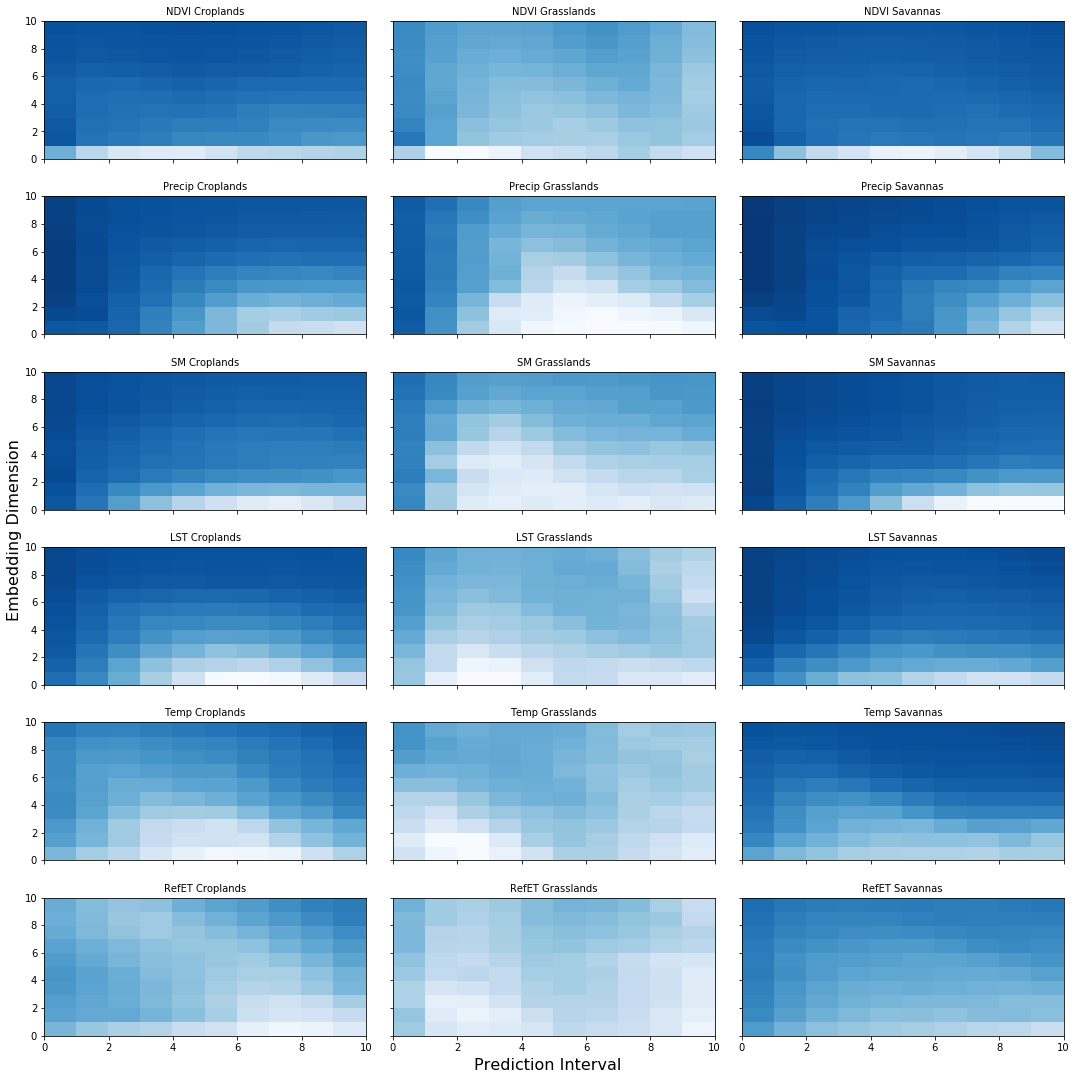

In [162]:
fig, axs = plt.subplots(6, 3, figsize=(15,15), sharex=True, sharey=True)
axs[0, 0].pcolor(tp_ndvi_croplands.iloc[:,1:], cmap = 'Blues', vmin = 0, vmax  = 1)
axs[0, 0].set_title('NDVI Croplands')
axs[0, 1].pcolor(tp_ndvi_grasslands.iloc[:,1:], cmap = 'Blues', vmin = 0, vmax  = 1)
axs[0, 1].set_title('NDVI Grasslands')
axs[0, 2].pcolor(tp_ndvi_savannas.iloc[:,1:], cmap = 'Blues', vmin = 0, vmax  = 1)
axs[0, 2].set_title('NDVI Savannas')
axs[1, 0].pcolor(tp_precip_croplands.iloc[:,1:], cmap = 'Blues', vmin = 0, vmax  = 1)
axs[1, 0].set_title('Precip Croplands')
axs[1, 1].pcolor(tp_precip_grasslands.iloc[:,1:], cmap = 'Blues', vmin = 0, vmax  = 1)
axs[1, 1].set_title('Precip Grasslands')
axs[1, 2].pcolor(tp_precip_savannas.iloc[:,1:], cmap = 'Blues', vmin = 0, vmax  = 1)
axs[1, 2].set_title('Precip Savannas')
axs[2, 0].pcolor(tp_sm_croplands.iloc[:,1:], cmap = 'Blues', vmin = 0, vmax  = 1)
axs[2, 0].set_title('SM Croplands')
axs[2, 1].pcolor(tp_sm_grasslands.iloc[:,1:], cmap = 'Blues', vmin = 0, vmax  = 1)
axs[2, 1].set_title('SM Grasslands')
axs[2, 2].pcolor(tp_sm_savannas.iloc[:,1:], cmap = 'Blues', vmin = 0, vmax  = 1)
axs[2, 2].set_title('SM Savannas')
axs[3, 0].pcolor(tp_lst_croplands.iloc[:,1:], cmap = 'Blues', vmin = 0, vmax  = 1)
axs[3, 0].set_title('LST Croplands')
axs[3, 1].pcolor(tp_lst_grasslands.iloc[:,1:], cmap = 'Blues', vmin = 0, vmax  = 1)
axs[3, 1].set_title('LST Grasslands')
axs[3, 2].pcolor(tp_lst_savannas.iloc[:,1:], cmap = 'Blues', vmin = 0, vmax  = 1)
axs[3, 2].set_title('LST Savannas')
axs[4, 0].pcolor(tp_temp_croplands.iloc[:,1:], cmap = 'Blues', vmin = 0, vmax  = 1)
axs[4, 0].set_title('Temp Croplands')
axs[4, 1].pcolor(tp_temp_grasslands.iloc[:,1:], cmap = 'Blues', vmin = 0, vmax  = 1)
axs[4, 1].set_title('Temp Grasslands')
axs[4, 2].pcolor(tp_temp_savannas.iloc[:,1:], cmap = 'Blues', vmin = 0, vmax  = 1)
axs[4, 2].set_title('Temp Savannas')
axs[5, 0].pcolor(tp_et_croplands.iloc[:,1:], cmap = 'Blues', vmin = 0, vmax  = 1)
axs[5, 0].set_title('RefET Croplands')
axs[5, 1].pcolor(tp_et_grasslands.iloc[:,1:], cmap = 'Blues', vmin = 0, vmax  = 1)
axs[5, 1].set_title('RefET Grasslands')
axs[5, 2].pcolor(tp_et_savannas.iloc[:,1:], cmap = 'Blues', vmin = 0, vmax  = 1)
axs[5, 2].set_title('RefET Savannas')

# axs[6, 0].plot(x, -y, 'tab:red')
# axs[6, 0].set_title('Axis [1,1]')
# axs[6, 1].plot(x, -y, 'tab:red')
# axs[6, 1].set_title('Axis [1,1]')
# axs[6, 2].plot(x, -y, 'tab:red')
# axs[6, 2].set_title('Axis [1,1]')

#for ax in axs.flat:
#     ax.set(vmin = 0, vmax  = 1)

# # Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()


fig.text(0.5, 0, 'Prediction Interval', ha = 'center')
fig.text(0, 0.5, 'Embedding Dimension', va = 'center', rotation = 'vertical')
fig.tight_layout()


#fig.colorbar(axs ax=axs.ravel().tolist())

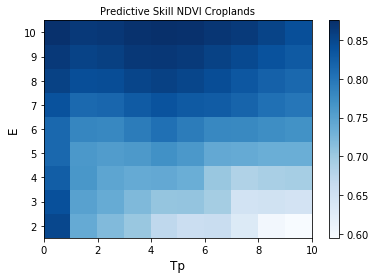

In [164]:
fig = plt.figure()
plt.pcolor(tp_ndvi_croplands.iloc[1:,1:], cmap = 'Blues')
plt.xlabel('Tp')
plt.ylabel('E')
plt.yticks([y + 0.5 for y in range(0,10)], tp_ndvi_croplands.E[1:])
plt.ylim([0,9])
plt.title('Predictive Skill NDVI Croplands')
plt.colorbar()
